In [3]:
# Data manipulation
import pandas as pd
import numpy as np
import time
import random
import string
# Data visualization
import matplotlib.pyplot as plt

# Model building and evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    precision_recall_curve,
    average_precision_score
)

# System and warnings
import warnings
warnings.filterwarnings("ignore")

# Display settings for clarity
pd.set_option('display.max_columns', None)

In [4]:
# Load the datasets into DataFrames
main_claim_df = pd.read_csv("/home/mubasshir/Desktop/Research/Insurance/Anonymized_dataset/Anonymized_Train-1542865627584.csv")
beneficiary_df = pd.read_csv("/home/mubasshir/Desktop/Research/Insurance/Anonymized_dataset/Anonymized_Train_Beneficiarydata.csv")
inpatient_df = pd.read_csv("/home/mubasshir/Desktop/Research/Insurance/Anonymized_dataset/Anonymized_Train_Inpatientdata.csv")
outpatient_df = pd.read_csv("/home/mubasshir/Desktop/Research/Insurance/Anonymized_dataset/Anonymized_Train_Outpatientdata.csv")

# Display top rows to confirm successful loading
print("Main Claim Data:")
display(main_claim_df.head())

print("Beneficiary Data:")
display(beneficiary_df.head())

print("Inpatient Data:")
display(inpatient_df.head())

print("Outpatient Data:")
display(outpatient_df.head())

# Check data shapes for clarity
print(f"Main Claim Shape: {main_claim_df.shape}")  #(row , column)
print(f"Beneficiary Shape: {beneficiary_df.shape}") #(row , column)
print(f"Inpatient Shape: {inpatient_df.shape}") #(row , column)
print(f"Outpatient Shape: {outpatient_df.shape}") #(row , column)

Main Claim Data:


Provider PotentialFraud
0  PRV51001             No
1  PRV51003            Yes
2  PRV51004             No
3  PRV51005            Yes
4  PRV51007             No

Beneficiary Data:


BeneID         DOB  DOD  Gender  \
0  62c5c5b1ec718a21c397f09c5bc6cf196a741576616275...  1943-01-01  NaN       1   
1  d54d44a9fc60d30a8857b1e3cfe24a1c16e5a09a157a3c...  1936-09-01  NaN       2   
2  56ef33518b533a792ae6e471e493e0cefd4792d380c6bd...  1936-08-01  NaN       1   
3  15415122c82e435504290d4f6f476726f0594c577ebac3...  1922-07-01  NaN       1   
4  43ad0b2a7221cd758f9e36b8696b322aa2b1a534185593...  1935-09-01  NaN       1   

   Race RenalDiseaseIndicator  State  County  NoOfMonths_PartACov  \
0     1                     0     39     230                   12   
1     1                     0     39     280                   12   
2     1                     0     52     590                   12   
3     1                     0     39     270                   12   
4     1                     0     24     680                   12   

   NoOfMonths_PartBCov  ChronicCond_Alzheimer  ChronicCond_Heartfailure  \
0                   12                      1                         2   
1                   12                      2                         2   
2                   12                      1                         2   
3                   12                      1                         1   
4                   12                      2                         2   

   ChronicCond_KidneyDisease  ChronicCond_Cancer  ChronicCond_ObstrPulmonary  \
0                          1                   2                           2   
1                          2                   2                           2   
2                          2                   2                           2   
3                          2                   2                           2   
4                          2                   2                           1   

   ChronicCond_Depression  ChronicCond_Diabetes  ChronicCond_IschemicHeart  \
0                       1                     1                          1   
1                       2                     2                          2   
2                       2                     2                          1   
3                       2                     1                          1   
4                       2                     1                          2   

   ChronicCond_Osteoporasis  ChronicCond_rheumatoidarthritis  \
0                         2                                1   
1                         2                                2   
2                         2                                2   
3                         1                                1   
4                         2                                2   

   ChronicCond_stroke  IPAnnualReimbursementAmt  IPAnnualDeductibleAmt  \
0                   1                     36000                   3204   
1                   2                         0                      0   
2                   2                         0                      0   
3                   2                         0                      0   
4                   2                         0                      0   

   OPAnnualReimbursementAmt  OPAnnualDeductibleAmt  
0                        60                     70  
1                        30                     50  
2                        90                     40  
3                      1810                    760  
4                      1790                   1200

Inpatient Data:


BeneID  \
0  62c5c5b1ec718a21c397f09c5bc6cf196a741576616275...   
1  62c5c5b1ec718a21c397f09c5bc6cf196a741576616275...   
2  62c5c5b1ec718a21c397f09c5bc6cf196a741576616275...   
3  89be34d4df0f5df66aa10a3743b6a3906bb574062bd11b...   
4  33cef30994eea7f643202d4a0413ef92894f699739e3d7...   

                                             ClaimID ClaimStartDt  ClaimEndDt  \
0  dd21878044b6d4b8c1e0fb7534a38acbe3cb0ef29e6375...   2009-04-12  2009-04-18   
1  1e3d2b1b6782fd037885e04b81796ae07524283a612bac...   2009-08-31  2009-09-02   
2  5d5acf65d788c49d586064959a80604d9e3695b1a1c1fa...   2009-09-17  2009-09-20   
3  497c7f708172aeb37630900e6541e05bd71422f2eed3c9...   2009-02-14  2009-02-22   
4  9bba19961169ed30292a19ad77f89c4a4e69c891ea56dd...   2009-08-13  2009-08-30   

   Provider  InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0  PRV55912                   26000          PHY390922                NaN   
1  PRV55907                    5000          PHY318495          PHY318495   
2  PRV56046                    5000          PHY372395                NaN   
3  PRV52405                    5000          PHY369659          PHY392961   
4  PRV56614                   10000          PHY379376          PHY398258   

  OtherPhysician AdmissionDt ClmAdmitDiagnosisCode  DeductibleAmtPaid  \
0            NaN  2009-04-12                  7866             1068.0   
1            NaN  2009-08-31                  6186             1068.0   
2      PHY324689  2009-09-17                 29590             1068.0   
3      PHY349768  2009-02-14                   431             1068.0   
4            NaN  2009-08-13                 78321             1068.0   

  DischargeDt DiagnosisGroupCode ClmDiagnosisCode_1 ClmDiagnosisCode_2  \
0  2009-04-18                201               1970               4019   
1  2009-09-02                750               6186               2948   
2  2009-09-20                883              29623              30390   
3  2009-02-22                067              43491               2762   
4  2009-08-30                975                042               3051   

  ClmDiagnosisCode_3 ClmDiagnosisCode_4 ClmDiagnosisCode_5 ClmDiagnosisCode_6  \
0               5853               7843               2768              71590   
1              56400                NaN                NaN                NaN   
2              71690              34590              V1581              32723   
3               7843              32723              V1041               4254   
4              34400               5856              42732                486   

  ClmDiagnosisCode_7 ClmDiagnosisCode_8 ClmDiagnosisCode_9  \
0               2724              19889               5849   
1                NaN                NaN                NaN   
2                NaN                NaN                NaN   
3              25062              40390               4019   
4               5119              29620              20300   

  ClmDiagnosisCode_10  ClmProcedureCode_1  ClmProcedureCode_2  \
0                 NaN                 NaN                 NaN   
1                 NaN              7092.0                 NaN   
2                 NaN                 NaN                 NaN   
3                 NaN               331.0                 NaN   
4                 NaN              3893.0                 NaN   

   ClmProcedureCode_3  ClmProcedureCode_4  ClmProcedureCode_5  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3                 NaN                 NaN                 NaN   
4                 NaN                 NaN                 NaN   

   ClmProcedureCode_6  
0                 NaN  
1                 NaN  
2                 NaN  
3                 NaN  
4                 NaN

Outpatient Data:


BeneID  \
0  d54d44a9fc60d30a8857b1e3cfe24a1c16e5a09a157a3c...   
1  56ef33518b533a792ae6e471e493e0cefd4792d380c6bd...   
2  56ef33518b533a792ae6e471e493e0cefd4792d380c6bd...   
3  15415122c82e435504290d4f6f476726f0594c577ebac3...   
4  15415122c82e435504290d4f6f476726f0594c577ebac3...   

                                             ClaimID ClaimStartDt  ClaimEndDt  \
0  d5ea881d5e0e35db1edebf011ee63c9ad9a21ae3470ffe...   2009-10-11  2009-10-11   
1  699ae13fa3cfcc979002e48e86e86cd7397e648e765208...   2009-02-12  2009-02-12   
2  3a00c94187a029d983108d002147b0679a0dce4a08d68a...   2009-06-27  2009-06-27   
3  fd988acaa93b29898afaf73c20ab55f4e5e348b5abba4c...   2009-01-06  2009-01-06   
4  0890387e8f43034e622db7a776bf417f95c04fb0fced0b...   2009-01-22  2009-01-22   

   Provider  InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0  PRV56011                      30          PHY326117                NaN   
1  PRV57610                      80          PHY362868                NaN   
2  PRV57595                      10          PHY328821                NaN   
3  PRV56011                      40          PHY334319                NaN   
4  PRV56011                     200          PHY403831                NaN   

  OtherPhysician ClmDiagnosisCode_1 ClmDiagnosisCode_2 ClmDiagnosisCode_3  \
0            NaN              78943              V5866              V1272   
1            NaN               6115                NaN                NaN   
2            NaN               2723                NaN                NaN   
3            NaN              71988                NaN                NaN   
4            NaN              82382              30000              72887   

  ClmDiagnosisCode_4 ClmDiagnosisCode_5 ClmDiagnosisCode_6 ClmDiagnosisCode_7  \
0                NaN                NaN                NaN                NaN   
1                NaN                NaN                NaN                NaN   
2                NaN                NaN                NaN                NaN   
3                NaN                NaN                NaN                NaN   
4               4280               7197              V4577                NaN   

  ClmDiagnosisCode_8 ClmDiagnosisCode_9 ClmDiagnosisCode_10  \
0                NaN                NaN                 NaN   
1                NaN                NaN                 NaN   
2                NaN                NaN                 NaN   
3                NaN                NaN                 NaN   
4                NaN                NaN                 NaN   

   ClmProcedureCode_1  ClmProcedureCode_2  ClmProcedureCode_3  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3                 NaN                 NaN                 NaN   
4                 NaN                 NaN                 NaN   

   ClmProcedureCode_4  ClmProcedureCode_5  ClmProcedureCode_6  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3                 NaN                 NaN                 NaN   
4                 NaN                 NaN                 NaN   

   DeductibleAmtPaid ClmAdmitDiagnosisCode  
0                  0                 56409  
1                  0                 79380  
2                  0                   NaN  
3                  0                   NaN  
4                  0                 71947

Main Claim Shape: (5410, 2)
Beneficiary Shape: (138556, 25)
Inpatient Shape: (40474, 30)
Outpatient Shape: (517737, 27)


In [5]:
#Exploratory Data Analysis (EDA)

In [6]:
def explore(df, name):
    print(f"\nüîπ {name} Info")
    print(df.info())
    print(f"\nüîπ {name} Summary Statistics")
    print(df.describe(include='all').transpose())
    print(f"\nüîπ {name} Null Value Counts")
    print(df.isnull().sum())

# EDA for each dataset
# explore(main_claim_df, "Main Claim Data")
# explore(beneficiary_df, "Beneficiary Data")
# explore(inpatient_df, "Inpatient Data")
# explore(outpatient_df, "Outpatient Data")

# Optional: Check target class distribution
# print("\nüéØ PotentialFraud Distribution:")
# print(main_claim_df['PotentialFraud'].value_counts(normalize=True))

In [7]:
print("Check Target Variable Distribution")
print(main_claim_df['PotentialFraud'].value_counts())

Check Target Variable Distribution
PotentialFraud
No     4904
Yes     506
Name: count, dtype: int64


In [8]:
# Function to display missing values
def missing_summary(df, name):
    print(f"\nüî∏ Missing Values in {name}:")
    missing = df.isnull().sum()
    missing = missing[missing > 0].sort_values(ascending=False)
    if not missing.empty:
        print(missing)
    else:
        print("No missing values.")

# Apply to each dataset
missing_summary(main_claim_df, "Main Claim Data")
missing_summary(beneficiary_df, "Beneficiary Data")
missing_summary(inpatient_df, "Inpatient Data")
missing_summary(outpatient_df, "Outpatient Data")


üî∏ Missing Values in Main Claim Data:
No missing values.

üî∏ Missing Values in Beneficiary Data:
DOD    137135
dtype: int64

üî∏ Missing Values in Inpatient Data:
ClmProcedureCode_6     40474
ClmProcedureCode_5     40465
ClmProcedureCode_4     40358
ClmProcedureCode_3     39509
ClmDiagnosisCode_10    36547
OtherPhysician         35784
ClmProcedureCode_2     35020
ClmProcedureCode_1     17326
OperatingPhysician     16644
ClmDiagnosisCode_9     13497
ClmDiagnosisCode_8      9942
ClmDiagnosisCode_7      7258
ClmDiagnosisCode_6      4838
ClmDiagnosisCode_5      2894
ClmDiagnosisCode_4      1534
DeductibleAmtPaid        899
ClmDiagnosisCode_3       676
ClmDiagnosisCode_2       226
AttendingPhysician       112
dtype: int64

üî∏ Missing Values in Outpatient Data:
ClmProcedureCode_6       517737
ClmProcedureCode_5       517737
ClmProcedureCode_4       517735
ClmProcedureCode_3       517733
ClmProcedureCode_2       517701
ClmProcedureCode_1       517575
ClmDiagnosisCode_10      516654
Cl

In [9]:
# Exploratory Data Analysis (EDA) for the main_claim_df

In [10]:
#Basic info
print("üîπ Dataset Info:")
print(main_claim_df.info())

üîπ Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5410 entries, 0 to 5409
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Provider        5410 non-null   object
 1   PotentialFraud  5410 non-null   object
dtypes: object(2)
memory usage: 84.7+ KB
None


In [11]:
# Preview of Data
print("\nüîπ First 5 Rows:")
print(main_claim_df.head())


üîπ First 5 Rows:
   Provider PotentialFraud
0  PRV51001             No
1  PRV51003            Yes
2  PRV51004             No
3  PRV51005            Yes
4  PRV51007             No


In [12]:
# Value counts for PotentialFraud
print("\n fraud level distribution")
print(main_claim_df['PotentialFraud'].value_counts())


 fraud level distribution
PotentialFraud
No     4904
Yes     506
Name: count, dtype: int64


In [13]:
print("\n Fraud Label Distribution (Normalized):")
print(main_claim_df['PotentialFraud'].value_counts(normalize=True))


 Fraud Label Distribution (Normalized):
PotentialFraud
No     0.90647
Yes    0.09353
Name: proportion, dtype: float64


In [14]:
#Check unique providers
print(f"\n Unique Providers: {main_claim_df['Provider'].nunique()}")


 Unique Providers: 5410


In [15]:
# Check for duplicate providers (if any)
duplicates = main_claim_df.duplicated(subset=['Provider']).sum()
print(f"\n Duplicate Provider Entries: {duplicates}")


 Duplicate Provider Entries: 0


In [16]:
# Missing values
print("\n Missing Values:")
print(main_claim_df.isnull().sum())


 Missing Values:
Provider          0
PotentialFraud    0
dtype: int64


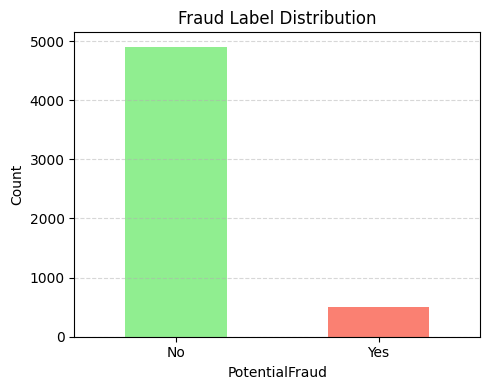

In [17]:
# Encode 'PotentialFraud' as numeric label
main_claim_df['FraudLabel'] = main_claim_df['PotentialFraud'].map({'Yes': 1, 'No': 0})

plt.figure(figsize=(5,4))
main_claim_df['PotentialFraud'].value_counts().plot(kind='bar', color=['lightgreen', 'salmon'])
plt.title("Fraud Label Distribution")
plt.xlabel("PotentialFraud")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [18]:
# Exploratory Data Analysis (EDA) - Beneficiary Data

In [19]:
# Basic info
print("üîπ Dataset Info:")
print(beneficiary_df.info())

üîπ Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   BeneID                           138556 non-null  object
 1   DOB                              138556 non-null  object
 2   DOD                              1421 non-null    object
 3   Gender                           138556 non-null  int64 
 4   Race                             138556 non-null  int64 
 5   RenalDiseaseIndicator            138556 non-null  object
 6   State                            138556 non-null  int64 
 7   County                           138556 non-null  int64 
 8   NoOfMonths_PartACov              138556 non-null  int64 
 9   NoOfMonths_PartBCov              138556 non-null  int64 
 10  ChronicCond_Alzheimer            138556 non-null  int64 
 11  ChronicCond_Heartfailure         138556 non-null  int64 
 1

In [20]:
# Preview of the data
print("\nüîπ First 5 Rows:")
print(beneficiary_df.head())


üîπ First 5 Rows:
                                              BeneID         DOB  DOD  Gender  \
0  62c5c5b1ec718a21c397f09c5bc6cf196a741576616275...  1943-01-01  NaN       1   
1  d54d44a9fc60d30a8857b1e3cfe24a1c16e5a09a157a3c...  1936-09-01  NaN       2   
2  56ef33518b533a792ae6e471e493e0cefd4792d380c6bd...  1936-08-01  NaN       1   
3  15415122c82e435504290d4f6f476726f0594c577ebac3...  1922-07-01  NaN       1   
4  43ad0b2a7221cd758f9e36b8696b322aa2b1a534185593...  1935-09-01  NaN       1   

   Race RenalDiseaseIndicator  State  County  NoOfMonths_PartACov  \
0     1                     0     39     230                   12   
1     1                     0     39     280                   12   
2     1                     0     52     590                   12   
3     1                     0     39     270                   12   
4     1                     0     24     680                   12   

   NoOfMonths_PartBCov  ChronicCond_Alzheimer  ChronicCond_Heartfailure  \
0  

In [21]:
# Check for missing values
print("\n Missing Values:")
print(beneficiary_df.isnull().sum())


 Missing Values:
BeneID                                  0
DOB                                     0
DOD                                137135
Gender                                  0
Race                                    0
RenalDiseaseIndicator                   0
State                                   0
County                                  0
NoOfMonths_PartACov                     0
NoOfMonths_PartBCov                     0
ChronicCond_Alzheimer                   0
ChronicCond_Heartfailure                0
ChronicCond_KidneyDisease               0
ChronicCond_Cancer                      0
ChronicCond_ObstrPulmonary              0
ChronicCond_Depression                  0
ChronicCond_Diabetes                    0
ChronicCond_IschemicHeart               0
ChronicCond_Osteoporasis                0
ChronicCond_rheumatoidarthritis         0
ChronicCond_stroke                      0
IPAnnualReimbursementAmt                0
IPAnnualDeductibleAmt                   0
OPAnnualReimburs

In [22]:
# Check number of unique beneficiaries
print(f"\n Unique Beneficiaries: {beneficiary_df['BeneID'].nunique()}")


 Unique Beneficiaries: 138556



 Gender Distribution:
Gender
2    79106
1    59450
Name: count, dtype: int64


Text(0, 0.5, 'Count')

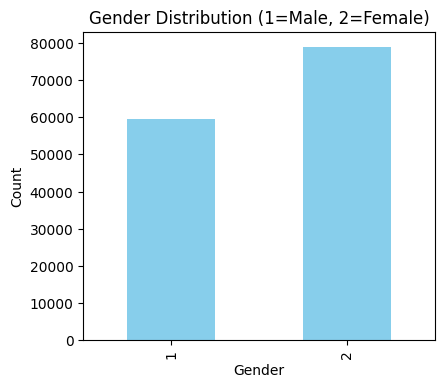

In [23]:
# Gender distribution
print("\n Gender Distribution:")
print(beneficiary_df['Gender'].value_counts())
gender_counts = beneficiary_df['Gender'].value_counts().sort_index()
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
gender_counts.plot(kind='bar', color='skyblue')
plt.title('Gender Distribution (1=Male, 2=Female)')
plt.xlabel('Gender')
plt.ylabel('Count')


 Race Distribution:
Race
1    117057
2     13538
3      5059
5      2902
Name: count, dtype: int64


Text(0, 0.5, 'Count')

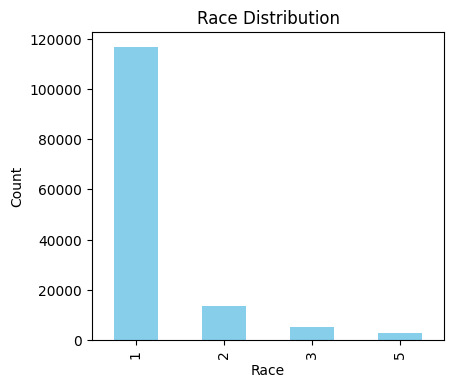

In [24]:
# Race distribution
print("\n Race Distribution:")
print(beneficiary_df['Race'].value_counts())
race_counts = beneficiary_df['Race'].value_counts().sort_index()
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
race_counts.plot(kind='bar', color='skyblue')
plt.title('Race Distribution')
plt.xlabel('Race')
plt.ylabel('Count')

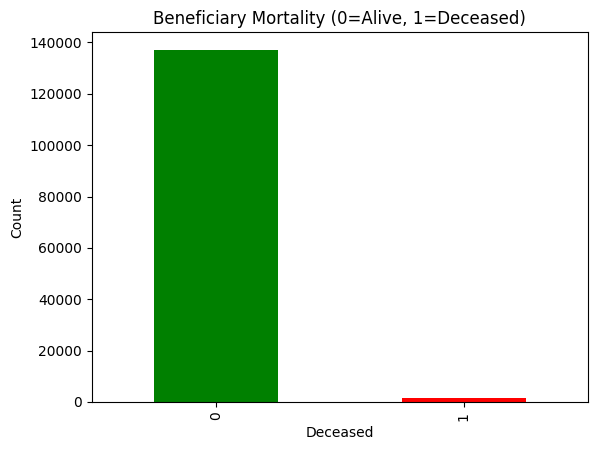

In [25]:
#Mortality Analysis (DOD column)
beneficiary_df['Deceased'] = beneficiary_df['DOD'].notnull().astype(int)
deceased_counts = beneficiary_df['Deceased'].value_counts()
deceased_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Beneficiary Mortality (0=Alive, 1=Deceased)')
plt.xlabel('Deceased')
plt.ylabel('Count')
plt.show()

In [26]:
# Annual Reimbursement and Deductible
print("\n Reimbursement and Deductible Summary:")
print(beneficiary_df[['IPAnnualReimbursementAmt', 'OPAnnualReimbursementAmt',
                      'IPAnnualDeductibleAmt', 'OPAnnualDeductibleAmt']].describe())


 Reimbursement and Deductible Summary:
       IPAnnualReimbursementAmt  OPAnnualReimbursementAmt  \
count             138556.000000             138556.000000   
mean                3660.346502               1298.219348   
std                 9568.621827               2493.901134   
min                -8000.000000                -70.000000   
25%                    0.000000                170.000000   
50%                    0.000000                570.000000   
75%                 2280.000000               1500.000000   
max               161470.000000             102960.000000   

       IPAnnualDeductibleAmt  OPAnnualDeductibleAmt  
count          138556.000000          138556.000000  
mean              399.847296             377.718258  
std               956.175202             645.530187  
min                 0.000000               0.000000  
25%                 0.000000              40.000000  
50%                 0.000000             170.000000  
75%              1068.000000    

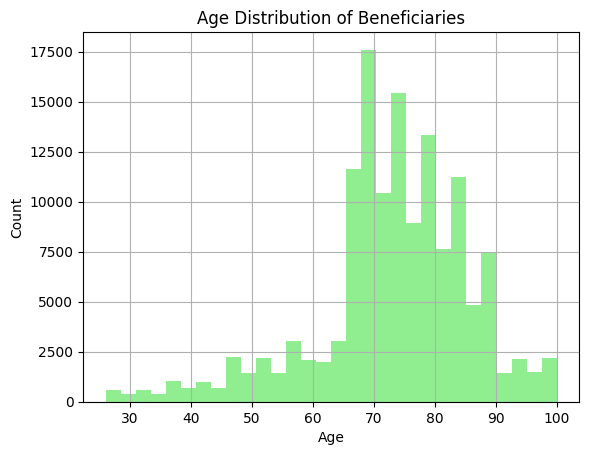

In [27]:
# Age Distribution
beneficiary_df['DOB'] = pd.to_datetime(beneficiary_df['DOB'], errors='coerce')
beneficiary_df['Age'] = 2009 - beneficiary_df['DOB'].dt.year  # using 2009 as reference year
beneficiary_df['Age'].hist(bins=30, color='lightgreen')
plt.title('Age Distribution of Beneficiaries')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [28]:
# Chronic Conditions Overview
chronic_cols = [col for col in beneficiary_df.columns if col.startswith('ChronicCond_')]
print("\n Chronic Condition Coverage (% with condition):")
print(beneficiary_df[chronic_cols].apply(lambda col: (col == 1).mean()).sort_values(ascending=False))


 Chronic Condition Coverage (% with condition):
ChronicCond_IschemicHeart          0.675857
ChronicCond_Diabetes               0.601858
ChronicCond_Heartfailure           0.493678
ChronicCond_Depression             0.355524
ChronicCond_Alzheimer              0.332183
ChronicCond_KidneyDisease          0.312357
ChronicCond_Osteoporasis           0.274683
ChronicCond_rheumatoidarthritis    0.256820
ChronicCond_ObstrPulmonary         0.237153
ChronicCond_Cancer                 0.119959
ChronicCond_stroke                 0.079058
dtype: float64


In [29]:
chronic_cols = [col for col in beneficiary_df.columns if 'ChronicCond' in col]
print("\n Chronic Condition Distributions:")
for col in chronic_cols:
    print(f"\n{col} Value Counts:\n{beneficiary_df[col].value_counts()}")


 Chronic Condition Distributions:

ChronicCond_Alzheimer Value Counts:
ChronicCond_Alzheimer
2    92530
1    46026
Name: count, dtype: int64

ChronicCond_Heartfailure Value Counts:
ChronicCond_Heartfailure
2    70154
1    68402
Name: count, dtype: int64

ChronicCond_KidneyDisease Value Counts:
ChronicCond_KidneyDisease
2    95277
1    43279
Name: count, dtype: int64

ChronicCond_Cancer Value Counts:
ChronicCond_Cancer
2    121935
1     16621
Name: count, dtype: int64

ChronicCond_ObstrPulmonary Value Counts:
ChronicCond_ObstrPulmonary
2    105697
1     32859
Name: count, dtype: int64

ChronicCond_Depression Value Counts:
ChronicCond_Depression
2    89296
1    49260
Name: count, dtype: int64

ChronicCond_Diabetes Value Counts:
ChronicCond_Diabetes
1    83391
2    55165
Name: count, dtype: int64

ChronicCond_IschemicHeart Value Counts:
ChronicCond_IschemicHeart
1    93644
2    44912
Name: count, dtype: int64

ChronicCond_Osteoporasis Value Counts:
ChronicCond_Osteoporasis
2    100497
1 

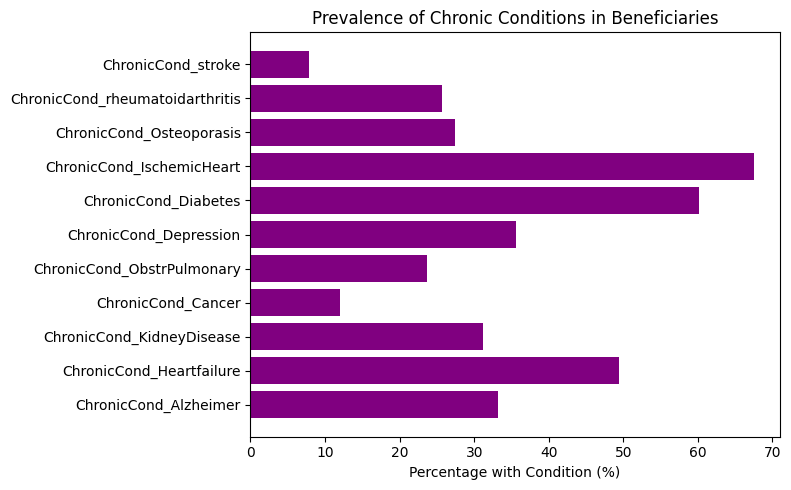

In [30]:
# Bar plot for % with each condition
chronic_percentages = {}
for col in chronic_cols:
    chronic_percentages[col] = (beneficiary_df[col] == 1).mean() * 100
plt.figure(figsize=(8,5))
plt.barh(list(chronic_percentages.keys()), list(chronic_percentages.values()), color='purple')
plt.xlabel('Percentage with Condition (%)')
plt.title('Prevalence of Chronic Conditions in Beneficiaries')
plt.tight_layout()
plt.show()

In [31]:
# Exploratory Data Analysis (EDA) - Inpatient Data

In [32]:
# Dataset Info
print("Dataset Info:")
print(inpatient_df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BeneID                  40474 non-null  object 
 1   ClaimID                 40474 non-null  object 
 2   ClaimStartDt            40474 non-null  object 
 3   ClaimEndDt              40474 non-null  object 
 4   Provider                40474 non-null  object 
 5   InscClaimAmtReimbursed  40474 non-null  int64  
 6   AttendingPhysician      40362 non-null  object 
 7   OperatingPhysician      23830 non-null  object 
 8   OtherPhysician          4690 non-null   object 
 9   AdmissionDt             40474 non-null  object 
 10  ClmAdmitDiagnosisCode   40474 non-null  object 
 11  DeductibleAmtPaid       39575 non-null  float64
 12  DischargeDt             40474 non-null  object 
 13  DiagnosisGroupCode      40474 non-null  object 
 14  ClmDiagnosisCode_1      

In [33]:
# Preview of the Data
print(inpatient_df.head())

                                              BeneID  \
0  62c5c5b1ec718a21c397f09c5bc6cf196a741576616275...   
1  62c5c5b1ec718a21c397f09c5bc6cf196a741576616275...   
2  62c5c5b1ec718a21c397f09c5bc6cf196a741576616275...   
3  89be34d4df0f5df66aa10a3743b6a3906bb574062bd11b...   
4  33cef30994eea7f643202d4a0413ef92894f699739e3d7...   

                                             ClaimID ClaimStartDt  ClaimEndDt  \
0  dd21878044b6d4b8c1e0fb7534a38acbe3cb0ef29e6375...   2009-04-12  2009-04-18   
1  1e3d2b1b6782fd037885e04b81796ae07524283a612bac...   2009-08-31  2009-09-02   
2  5d5acf65d788c49d586064959a80604d9e3695b1a1c1fa...   2009-09-17  2009-09-20   
3  497c7f708172aeb37630900e6541e05bd71422f2eed3c9...   2009-02-14  2009-02-22   
4  9bba19961169ed30292a19ad77f89c4a4e69c891ea56dd...   2009-08-13  2009-08-30   

   Provider  InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0  PRV55912                   26000          PHY390922                NaN   
1  PRV55907           

In [34]:
# Missing Value Check
print("\n Missing Values:")
print(inpatient_df.isnull().sum())


 Missing Values:
BeneID                        0
ClaimID                       0
ClaimStartDt                  0
ClaimEndDt                    0
Provider                      0
InscClaimAmtReimbursed        0
AttendingPhysician          112
OperatingPhysician        16644
OtherPhysician            35784
AdmissionDt                   0
ClmAdmitDiagnosisCode         0
DeductibleAmtPaid           899
DischargeDt                   0
DiagnosisGroupCode            0
ClmDiagnosisCode_1            0
ClmDiagnosisCode_2          226
ClmDiagnosisCode_3          676
ClmDiagnosisCode_4         1534
ClmDiagnosisCode_5         2894
ClmDiagnosisCode_6         4838
ClmDiagnosisCode_7         7258
ClmDiagnosisCode_8         9942
ClmDiagnosisCode_9        13497
ClmDiagnosisCode_10       36547
ClmProcedureCode_1        17326
ClmProcedureCode_2        35020
ClmProcedureCode_3        39509
ClmProcedureCode_4        40358
ClmProcedureCode_5        40465
ClmProcedureCode_6        40474
dtype: int64


In [35]:
# Number of unique claims and providers
print(f"\n Unique Claims: {inpatient_df['ClaimID'].nunique()}")
print(f" Unique Providers: {inpatient_df['Provider'].nunique()}")


 Unique Claims: 40474
 Unique Providers: 2092


In [36]:
#  Distribution of Reimbursed Amounts
print("\n Reimbursement Amount Statistics:")
print(inpatient_df['InscClaimAmtReimbursed'].describe())


 Reimbursement Amount Statistics:
count     40474.000000
mean      10087.884074
std       10303.099402
min           0.000000
25%        4000.000000
50%        7000.000000
75%       12000.000000
max      125000.000000
Name: InscClaimAmtReimbursed, dtype: float64


In [37]:
# Count of claims per provider (top 5)
print("\n Top 5 Providers by Claim Count:")
print(inpatient_df['Provider'].value_counts().head())


 Top 5 Providers by Claim Count:
Provider
PRV52019    516
PRV55462    386
PRV54367    322
PRV53706    282
PRV55209    275
Name: count, dtype: int64


In [38]:
# Admission vs Claim Dates check (optional consistency)
inpatient_df['ClaimStartDt'] = pd.to_datetime(inpatient_df['ClaimStartDt'], errors='coerce')
inpatient_df['AdmissionDt'] = pd.to_datetime(inpatient_df['AdmissionDt'], errors='coerce')

invalid_admission_dates = (inpatient_df['AdmissionDt'] > inpatient_df['ClaimStartDt']).sum()
print(f"\n Admission Date after Claim Start Date (possible issue): {invalid_admission_dates}")



 Admission Date after Claim Start Date (possible issue): 0


In [39]:
# Length of Stay (if dates are valid)
inpatient_df['ClaimEndDt'] = pd.to_datetime(inpatient_df['ClaimEndDt'], errors='coerce')
inpatient_df['LOS'] = (inpatient_df['ClaimEndDt'] - inpatient_df['ClaimStartDt']).dt.days
print("\n Length of Stay Statistics (Days):")
print(inpatient_df['LOS'].describe())


 Length of Stay Statistics (Days):
count    40474.000000
mean         5.660251
std          5.628873
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max         36.000000
Name: LOS, dtype: float64


In [40]:
# Diagnoses overview (count of filled codes)
diagnosis_cols = [col for col in inpatient_df.columns if col.startswith("ClmDiagnosisCode")]
print("\n Diagnoses Code Availability:")
print(inpatient_df[diagnosis_cols].notnull().sum().sort_values(ascending=False))


 Diagnoses Code Availability:
ClmDiagnosisCode_1     40474
ClmDiagnosisCode_2     40248
ClmDiagnosisCode_3     39798
ClmDiagnosisCode_4     38940
ClmDiagnosisCode_5     37580
ClmDiagnosisCode_6     35636
ClmDiagnosisCode_7     33216
ClmDiagnosisCode_8     30532
ClmDiagnosisCode_9     26977
ClmDiagnosisCode_10     3927
dtype: int64


In [41]:
#  Procedure codes overview
procedure_cols = [col for col in inpatient_df.columns if col.startswith("ClmProcedureCode")]
print("\n Procedure Code Availability:")
print(inpatient_df[procedure_cols].notnull().sum().sort_values(ascending=False))


 Procedure Code Availability:
ClmProcedureCode_1    23148
ClmProcedureCode_2     5454
ClmProcedureCode_3      965
ClmProcedureCode_4      116
ClmProcedureCode_5        9
ClmProcedureCode_6        0
dtype: int64


In [42]:
# Exploratory Data Analysis (EDA) - Outpatient Data

In [43]:
print("Dataset Info:")
print(outpatient_df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517737 entries, 0 to 517736
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   BeneID                  517737 non-null  object 
 1   ClaimID                 517737 non-null  object 
 2   ClaimStartDt            517737 non-null  object 
 3   ClaimEndDt              517737 non-null  object 
 4   Provider                517737 non-null  object 
 5   InscClaimAmtReimbursed  517737 non-null  int64  
 6   AttendingPhysician      516341 non-null  object 
 7   OperatingPhysician      90617 non-null   object 
 8   OtherPhysician          195046 non-null  object 
 9   ClmDiagnosisCode_1      507284 non-null  object 
 10  ClmDiagnosisCode_2      322357 non-null  object 
 11  ClmDiagnosisCode_3      203257 non-null  object 
 12  ClmDiagnosisCode_4      125596 non-null  object 
 13  ClmDiagnosisCode_5      74344 non-null   object 
 14  ClmDia

In [44]:
print("\nFirst 5 Rows:")
print(outpatient_df.head())


First 5 Rows:
                                              BeneID  \
0  d54d44a9fc60d30a8857b1e3cfe24a1c16e5a09a157a3c...   
1  56ef33518b533a792ae6e471e493e0cefd4792d380c6bd...   
2  56ef33518b533a792ae6e471e493e0cefd4792d380c6bd...   
3  15415122c82e435504290d4f6f476726f0594c577ebac3...   
4  15415122c82e435504290d4f6f476726f0594c577ebac3...   

                                             ClaimID ClaimStartDt  ClaimEndDt  \
0  d5ea881d5e0e35db1edebf011ee63c9ad9a21ae3470ffe...   2009-10-11  2009-10-11   
1  699ae13fa3cfcc979002e48e86e86cd7397e648e765208...   2009-02-12  2009-02-12   
2  3a00c94187a029d983108d002147b0679a0dce4a08d68a...   2009-06-27  2009-06-27   
3  fd988acaa93b29898afaf73c20ab55f4e5e348b5abba4c...   2009-01-06  2009-01-06   
4  0890387e8f43034e622db7a776bf417f95c04fb0fced0b...   2009-01-22  2009-01-22   

   Provider  InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0  PRV56011                      30          PHY326117                NaN   
1  PRV5

In [45]:
print("\nMissing Values:")
print(outpatient_df.isnull().sum())


Missing Values:
BeneID                         0
ClaimID                        0
ClaimStartDt                   0
ClaimEndDt                     0
Provider                       0
InscClaimAmtReimbursed         0
AttendingPhysician          1396
OperatingPhysician        427120
OtherPhysician            322691
ClmDiagnosisCode_1         10453
ClmDiagnosisCode_2        195380
ClmDiagnosisCode_3        314480
ClmDiagnosisCode_4        392141
ClmDiagnosisCode_5        443393
ClmDiagnosisCode_6        468981
ClmDiagnosisCode_7        484776
ClmDiagnosisCode_8        494825
ClmDiagnosisCode_9        502899
ClmDiagnosisCode_10       516654
ClmProcedureCode_1        517575
ClmProcedureCode_2        517701
ClmProcedureCode_3        517733
ClmProcedureCode_4        517735
ClmProcedureCode_5        517737
ClmProcedureCode_6        517737
DeductibleAmtPaid              0
ClmAdmitDiagnosisCode     412312
dtype: int64


In [46]:
#  Number of unique claims and providers
print(f"\nUnique Claims: {outpatient_df['ClaimID'].nunique()}")
print(f"Unique Providers: {outpatient_df['Provider'].nunique()}")


Unique Claims: 517737
Unique Providers: 5012


In [47]:
# Reimbursement summary
print("\nReimbursement Amount Statistics:")
print(outpatient_df['InscClaimAmtReimbursed'].describe())


Reimbursement Amount Statistics:
count    517737.000000
mean        286.334799
std         694.034343
min           0.000000
25%          40.000000
50%          80.000000
75%         200.000000
max      102500.000000
Name: InscClaimAmtReimbursed, dtype: float64


In [48]:
# Deductible summary
print("\n Deductible Amount Statistics:")
print(outpatient_df['DeductibleAmtPaid'].describe())


 Deductible Amount Statistics:
count    517737.000000
mean          2.779233
std          15.785839
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         897.000000
Name: DeductibleAmtPaid, dtype: float64


In [49]:
# Claim duration
outpatient_df['ClaimStartDt'] = pd.to_datetime(outpatient_df['ClaimStartDt'], errors='coerce')
outpatient_df['ClaimEndDt'] = pd.to_datetime(outpatient_df['ClaimEndDt'], errors='coerce')
outpatient_df['ClaimDuration'] = (outpatient_df['ClaimEndDt'] - outpatient_df['ClaimStartDt']).dt.days
print("\nClaim Duration (Days):")
print(outpatient_df['ClaimDuration'].describe())


Claim Duration (Days):
count    517737.000000
mean          1.420532
std           4.707387
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          23.000000
Name: ClaimDuration, dtype: float64


In [50]:
# Diagnoses overview
diagnosis_cols_op = [col for col in outpatient_df.columns if col.startswith("ClmDiagnosisCode")]
print("\nDiagnoses Code Availability:")
print(outpatient_df[diagnosis_cols_op].notnull().sum().sort_values(ascending=False))


Diagnoses Code Availability:
ClmDiagnosisCode_1     507284
ClmDiagnosisCode_2     322357
ClmDiagnosisCode_3     203257
ClmDiagnosisCode_4     125596
ClmDiagnosisCode_5      74344
ClmDiagnosisCode_6      48756
ClmDiagnosisCode_7      32961
ClmDiagnosisCode_8      22912
ClmDiagnosisCode_9      14838
ClmDiagnosisCode_10      1083
dtype: int64


In [51]:
# Procedure codes overview
procedure_cols_op = [col for col in outpatient_df.columns if col.startswith("ClmProcedureCode")]
print("\n Procedure Code Availability:")
print(outpatient_df[procedure_cols_op].notnull().sum().sort_values(ascending=False))


 Procedure Code Availability:
ClmProcedureCode_1    162
ClmProcedureCode_2     36
ClmProcedureCode_3      4
ClmProcedureCode_4      2
ClmProcedureCode_5      0
ClmProcedureCode_6      0
dtype: int64


In [52]:
# Top 5 providers by number of outpatient claims
print("\n Top 5 Providers by Claim Count:")
print(outpatient_df['Provider'].value_counts().head())


 Top 5 Providers by Claim Count:
Provider
PRV51459    8240
PRV53797    4739
PRV51574    4444
PRV53918    3588
PRV54895    3433
Name: count, dtype: int64


In [53]:
# Combine inpatient and outpatient claims
claims_df = pd.concat([inpatient_df, outpatient_df], ignore_index=True)

In [54]:
# Merge with beneficiary info
merged_claims = claims_df.merge(beneficiary_df, on='BeneID', how='left')

In [55]:
# Convert dates
merged_claims['ClaimStartDt'] = pd.to_datetime(merged_claims['ClaimStartDt'], errors='coerce')
merged_claims['ClaimEndDt'] = pd.to_datetime(merged_claims['ClaimEndDt'], errors='coerce')
merged_claims['LOS'] = (merged_claims['ClaimEndDt'] - merged_claims['ClaimStartDt']).dt.days


In [56]:
# Convert monetary columns to numeric
merged_claims['InscClaimAmtReimbursed'] = pd.to_numeric(merged_claims['InscClaimAmtReimbursed'], errors='coerce')
merged_claims['DeductibleAmtPaid'] = pd.to_numeric(merged_claims['DeductibleAmtPaid'], errors='coerce')


In [57]:
#  Aggregate features by Provider
agg_df = merged_claims.groupby('Provider').agg({
    'ClaimID': 'count',
    'InscClaimAmtReimbursed': 'sum',
    'DeductibleAmtPaid': 'sum',
    'LOS': 'mean',
    'Gender': lambda x: x.mode().iloc[0] if not x.mode().empty else None,
    'Race': lambda x: x.mode().iloc[0] if not x.mode().empty else None,
    'ChronicCond_Diabetes': 'mean',
    'ChronicCond_Heartfailure': 'mean',
    'ChronicCond_Depression': 'mean',
    'ChronicCond_IschemicHeart': 'mean',
    'ChronicCond_stroke': 'mean',
    'IPAnnualReimbursementAmt': 'mean',
    'OPAnnualReimbursementAmt': 'mean',
    'IPAnnualDeductibleAmt': 'mean',
    'OPAnnualDeductibleAmt': 'mean'
}).reset_index()

In [58]:
#  Rename columns for clarity
agg_df.columns = [
    'Provider', 'TotalClaims', 'TotalReimbursed', 'TotalDeductible', 'Avg_LOS',
    'MostCommonGender', 'MostCommonRace',
    'Avg_Diabetes', 'Avg_HeartFailure', 'Avg_Depression', 'Avg_IschemicHeart', 'Avg_Stroke',
    'Avg_IP_Reimbursed', 'Avg_OP_Reimbursed', 'Avg_IP_Deductible', 'Avg_OP_Deductible'
]

In [59]:
# Merge with label
final_df = agg_df.merge(main_claim_df[['Provider', 'PotentialFraud']], on='Provider', how='inner')


In [60]:
# Encode categorical features
from sklearn.preprocessing import LabelEncoder


In [61]:
le_gender = LabelEncoder()
le_race = LabelEncoder()

final_df['MostCommonGender'] = le_gender.fit_transform(final_df['MostCommonGender'].astype(str))
final_df['MostCommonRace'] = le_race.fit_transform(final_df['MostCommonRace'].astype(str))
final_df['FraudLabel'] = final_df['PotentialFraud'].map({'Yes': 1, 'No': 0})

In [62]:
# Define final features and labels
X = final_df.drop(columns=['Provider', 'PotentialFraud', 'FraudLabel'])
y = final_df['FraudLabel']

In [63]:
# Feature Engineering (Provider-level)

In [64]:
# Combine Inpatient & Outpatient claims
claims_df = pd.concat([inpatient_df, outpatient_df], ignore_index=True)

In [65]:
#  Merge with Beneficiary Data
claims_merged = claims_df.merge(beneficiary_df, on='BeneID', how='left')


In [66]:
# Convert data types
claims_merged['InscClaimAmtReimbursed'] = pd.to_numeric(claims_merged['InscClaimAmtReimbursed'], errors='coerce')
claims_merged['DeductibleAmtPaid'] = pd.to_numeric(claims_merged['DeductibleAmtPaid'], errors='coerce')
claims_merged['ClaimStartDt'] = pd.to_datetime(claims_merged['ClaimStartDt'], errors='coerce')
claims_merged['ClaimEndDt'] = pd.to_datetime(claims_merged['ClaimEndDt'], errors='coerce')
claims_merged['LOS'] = (claims_merged['ClaimEndDt'] - claims_merged['ClaimStartDt']).dt.days


In [67]:
# Aggregate features at Provider-level
agg_features = claims_merged.groupby('Provider').agg({
    'ClaimID': 'count',
    'InscClaimAmtReimbursed': 'sum',
    'DeductibleAmtPaid': 'sum',
    'LOS': 'mean',
    'Gender': lambda x: x.mode().iloc[0] if not x.mode().empty else None,
    'Race': lambda x: x.mode().iloc[0] if not x.mode().empty else None,
    'ChronicCond_Diabetes': 'mean',
    'ChronicCond_Heartfailure': 'mean',
    'ChronicCond_Depression': 'mean',
    'ChronicCond_IschemicHeart': 'mean',
    'ChronicCond_stroke': 'mean',
    'IPAnnualReimbursementAmt': 'mean',
    'OPAnnualReimbursementAmt': 'mean',
    'IPAnnualDeductibleAmt': 'mean',
    'OPAnnualDeductibleAmt': 'mean'
}).reset_index()

In [68]:
# Rename columns for clarity
agg_features.columns = [
    'Provider', 'TotalClaims', 'TotalReimbursed', 'TotalDeductible', 'Avg_LOS',
    'MostCommonGender', 'MostCommonRace',
    'Avg_Diabetes', 'Avg_HeartFailure', 'Avg_Depression', 'Avg_IschemicHeart', 'Avg_Stroke',
    'Avg_IP_Reimbursed', 'Avg_OP_Reimbursed', 'Avg_IP_Deductible', 'Avg_OP_Deductible'
]


In [69]:
# Merge with Target Variable
final_df = agg_features.merge(main_claim_df[['Provider', 'PotentialFraud']], on='Provider', how='inner')


In [70]:
# Encode categorical variables
le_gender = LabelEncoder()
le_race = LabelEncoder()
final_df['MostCommonGender'] = le_gender.fit_transform(final_df['MostCommonGender'].astype(str))
final_df['MostCommonRace'] = le_race.fit_transform(final_df['MostCommonRace'].astype(str))
final_df['FraudLabel'] = final_df['PotentialFraud'].map({'Yes': 1, 'No': 0})

In [71]:
#  Separate features and target
X = final_df.drop(columns=['Provider', 'PotentialFraud', 'FraudLabel'])
y = final_df['FraudLabel']

In [72]:
print("Feature engineering (provider-level) complete.")
print("Feature Matrix Shape:", X.shape)

Feature engineering (provider-level) complete.
Feature Matrix Shape: (5410, 15)


In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.pipeline import Pipeline
import numpy as np

In [74]:
# Standardize features + build pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'))
])


In [75]:
# Define cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [76]:
# Cross-validation
print(" Performing 5-Fold Cross-Validation...")
scores = cross_val_score(pipeline, X, y, cv=cv, scoring='roc_auc')

 Performing 5-Fold Cross-Validation...


In [77]:
# Output Results
print("\n Random Forest AUC Scores (5 folds):", np.round(scores, 4))
print("Mean AUC Score:", scores.mean())
print(" Standard Deviation:", scores.std())


 Random Forest AUC Scores (5 folds): [0.924  0.9154 0.9222 0.9223 0.9261]
Mean AUC Score: 0.9220182188901843
 Standard Deviation: 0.0035831237951392254


In [78]:
 # Model Training & Evaluation - Random Forest

üìÑ Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       981
           1       0.72      0.51      0.60       101

    accuracy                           0.94      1082
   macro avg       0.84      0.75      0.78      1082
weighted avg       0.93      0.94      0.93      1082



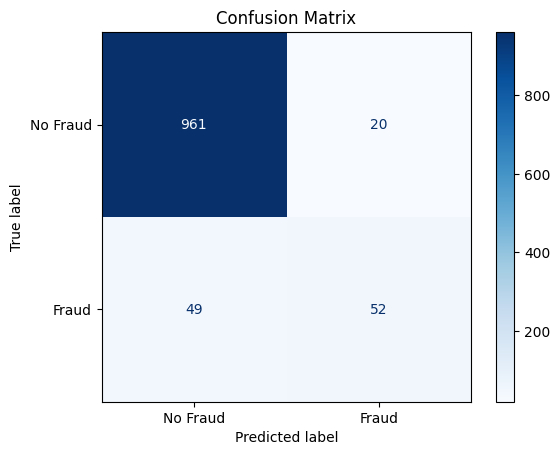


 ROC AUC Score: 0.9475


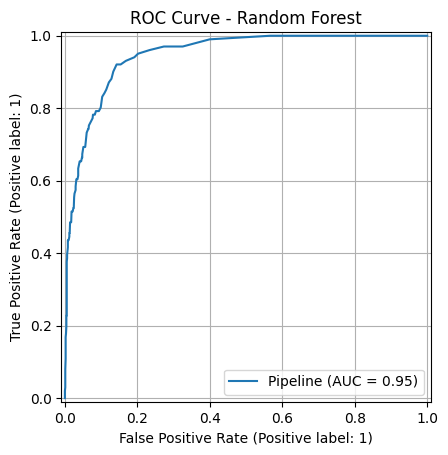

In [83]:
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, RocCurveDisplay
)
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# 1. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 2. Build pipeline (scaling + model)
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42))
])

# 3. Train the model
pipeline.fit(X_train, y_train)

# 4. Predict
y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:, 1]

# 5. Classification Report
print("üìÑ Classification Report:\n")
print(classification_report(y_test, y_pred))

# 6. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Fraud', 'Fraud'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

# 7. ROC AUC Score and Curve
auc = roc_auc_score(y_test, y_proba)
print(f"\n ROC AUC Score: {auc:.4f}")

RocCurveDisplay.from_estimator(pipeline, X_test, y_test)
plt.title("ROC Curve - Random Forest")
plt.grid(True)
plt.show()



üîç Top 20 Important Features:

          Feature  Importance
  TotalReimbursed    0.288089
  TotalDeductible    0.198985
      TotalClaims    0.074378
          Avg_LOS    0.072447
Avg_IP_Reimbursed    0.057276
Avg_IP_Deductible    0.049998
 Avg_HeartFailure    0.044208
       Avg_Stroke    0.043680
   Avg_Depression    0.035252
Avg_IschemicHeart    0.034500
Avg_OP_Reimbursed    0.033593
Avg_OP_Deductible    0.033272
     Avg_Diabetes    0.030849
 MostCommonGender    0.003447
   MostCommonRace    0.000026


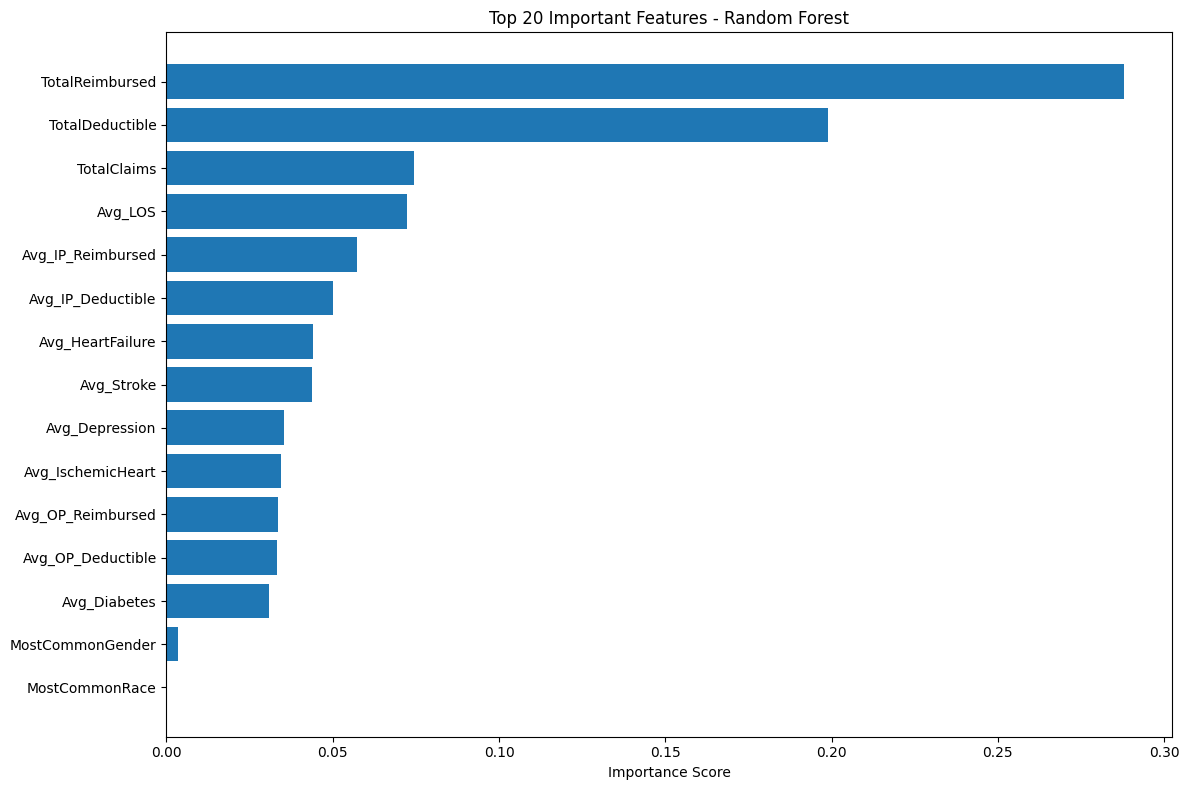

In [90]:
# Get feature names ‚Äî assuming X is a pandas DataFrame
feature_names = X.columns if hasattr(X, 'columns') else [f'Feature {i}' for i in range(X.shape[1])]

# Extract trained RandomForest model from pipeline
rf_model = pipeline.named_steps['rf']
importances = rf_model.feature_importances_

# Create DataFrame of features and their importance
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display top 20 features
print("\nüîç Top 20 Important Features:\n")
print(feat_imp_df.head(20).to_string(index=False))

# Plot top 20 feature importances
plt.figure(figsize=(12, 8))
plt.barh(feat_imp_df['Feature'].head(20), feat_imp_df['Importance'].head(20))
plt.gca().invert_yaxis()
plt.title("Top 20 Important Features - Random Forest")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()